# Part 1 ‐ Exploratory data analysis

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [2]:
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [11]:
# Check for null values
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [3]:
login.set_index('login_time', inplace=True)
login['count'] = 1
login.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [4]:
# Aggregate samples in every 15 minute time interval
login_resample = login.resample('15T', label='right').sum()
login_resample.head()

,count
login_time,
1970-01-01 20:15:00,2
1970-01-01 20:30:00,6
1970-01-01 20:45:00,9
1970-01-01 21:00:00,7
1970-01-01 21:15:00,1


In [5]:
login_resample.tail()

,count
login_time,
1970-04-13 18:00:00,5
1970-04-13 18:15:00,5
1970-04-13 18:30:00,2
1970-04-13 18:45:00,7
1970-04-13 19:00:00,6


This data seems to be only for the year 1970

In [6]:
login_resample['time'] = pd.to_datetime(login_resample.index)
login_resample['month'] = login_resample.time.dt.month
login_resample['day'] = login_resample.time.dt.day
login_resample['hour'] = login_resample.time.dt.hour
login_resample['week'] = login_resample.time.dt.isocalendar().week
login_resample['weekday'] = login_resample.time.dt.weekday

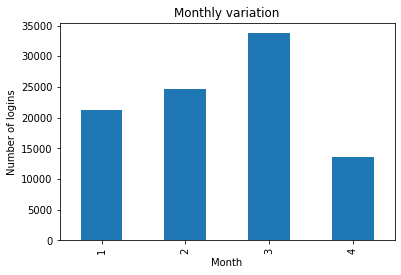

In [7]:
login_resample.groupby('month')['count'].sum().plot(kind='bar',xlabel='Month',ylabel='Number of logins',title='Monthly variation')

Month of March seems to have maximum number of logins and month of April seems to have minimum number of logins

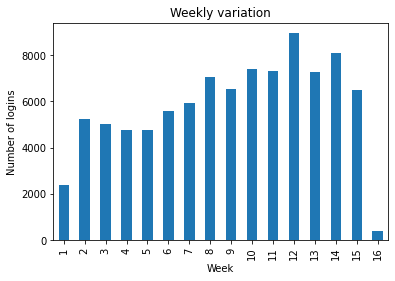

In [36]:
login_resample.groupby('week')['count'].sum().plot(kind='bar',xlabel='Week',ylabel='Number of logins',title='Weekly variation')

Week 12 has maximum number of logins and week 16 has minimum number of logins.

[Text(0, 0, 'Monday'),
 Text(0, 0, 'Tuesday'),
 Text(0, 0, 'Wednesday'),
 Text(0, 0, 'Thursday'),
 Text(0, 0, 'Friday'),
 Text(0, 0, 'Saturday'),
 Text(0, 0, 'Sunday')]

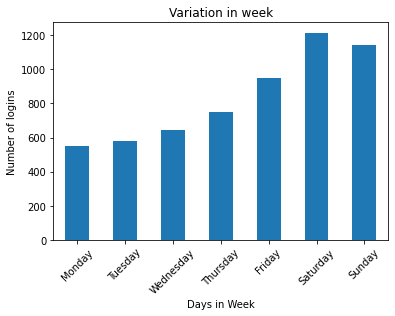

In [21]:
import calendar

# total number of weeks

nweek = 16
ax =(login_resample.groupby('weekday')['count'].sum()/nweek).plot(kind='bar',xlabel='Days in Week',ylabel='Number of logins',title='Variation in week')
ax.set_xticklabels([calendar.day_name[d] for d in range(7)],rotation=45)



Weekends seem to have more logins in comparison to rest of the week.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

a. how you will implement the experiment

b. what statistical test(s) you will conduct to verify the significance of the
observation

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

### Solution

1. I would choose inrease in the reimbursed toll cost to driver partners by the Ultimate Inc. vs number of each side trips as a metric of success. Inrcease in the reimbursement of toll charges would make sure that partner drivers are commuting through the toll-bridge. Number of trips in each direction will ensure that toll cost increase is not only due to one way traffic. 

2. I would like to collect following information:

    - Unique identifier for each driver partner
    - No. of trips in each direction by each driver partner
    - Time of day of each trip
    - Day of week of each trip
    - Percent increase in the reimbursement of toll charges
    
     I would first perform significance tests to see which factors affect the increase in reimbursement cost. After this, I would explore using visual tools. Then I would make a presentation to show the recommendations. 

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

In [22]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [25]:
# Find out which columns have missing entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


avg_rating_of_driver, phone, avg_rating_by_driver columns have missing entries

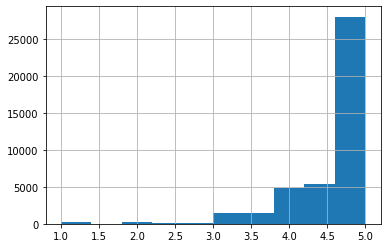

In [29]:
# Visualize avg_rating_of_driver columns

df['avg_rating_of_driver'].hist()

In [31]:
# Replace using mean
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


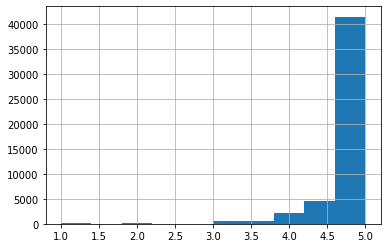

In [33]:
# Visualize avg_rating_by_driver columns
df['avg_rating_by_driver'].hist()

In [34]:
# Replace using mean
df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


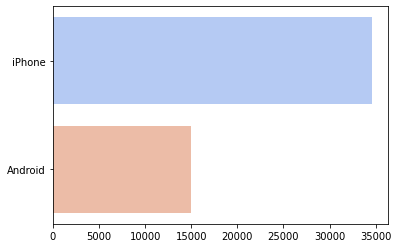

In [37]:
# Visualize phone types

import seaborn as sns
#f, ax = plt.subplots(figsize=(5, 5))

# In the following brackets, we want the value_counts() of the phone types 
x = pd.DataFrame(df.phone.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.phone into the list() function
values = list(x.phone)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="coolwarm")

In [58]:
print('Ratio of number of iPhone users and Android users is ',(df['phone']=='iPhone').sum()/(df['phone']=='Android').sum())

Ratio of number of iPhone users and Android users is  2.302090267607509


We fill the missing phone colums in 2.3:1 (206:90) ratio so that over all ratio remains the same

In [61]:
df['phone'][1]

'Android'

In [73]:
import random
nans = df['phone'].isna()
length = sum(nans)
replacement = random.choices(['iPhone', 'Android'], weights=[2.3/3.3, 1/3.3], k=length)
df.loc[nans,'phone'] = replacement

In [75]:
print('Ratio of number of iPhone users and Android users is ',(df['phone']=='iPhone').sum()/(df['phone']=='Android').sum())

Ratio of number of iPhone users and Android users is  2.3033826638477803


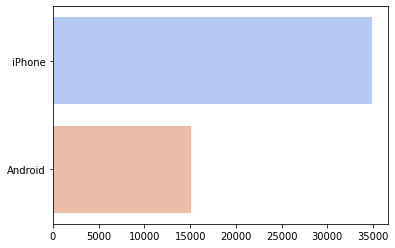

In [76]:
x = pd.DataFrame(df.phone.value_counts())

# Get the state names by calling list() on the x.index
names = list(x.index)

# Get the values by plugging x.phone into the list() function
values = list(x.phone)

# We're now going to call the barplot() method on our sns seaborn object. 
# If you don't have a searborn object yet, make sure you've imported seaborn as sns in your imports above. 
sns.barplot(x=values, y=names, palette="coolwarm")

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [79]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [80]:
# Convert dates to datetime object
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

### Fraction of drivers retained

In [83]:
df['last_trip_date'].sort_values().tail()

45126   2014-07-01
38651   2014-07-01
14473   2014-07-01
22735   2014-07-01
45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

So last trip date is July 1, 2014. Therefore an user is retained if the user is active in last 30 days

In [85]:
frac = len(df[df['last_trip_date'] > '2014-06-01'])/len(df)
print('{:.2f}% of the observed users were retained.'.format(frac*100))

36.62% of the observed users were retained.


### Exploratory Data Analysis 

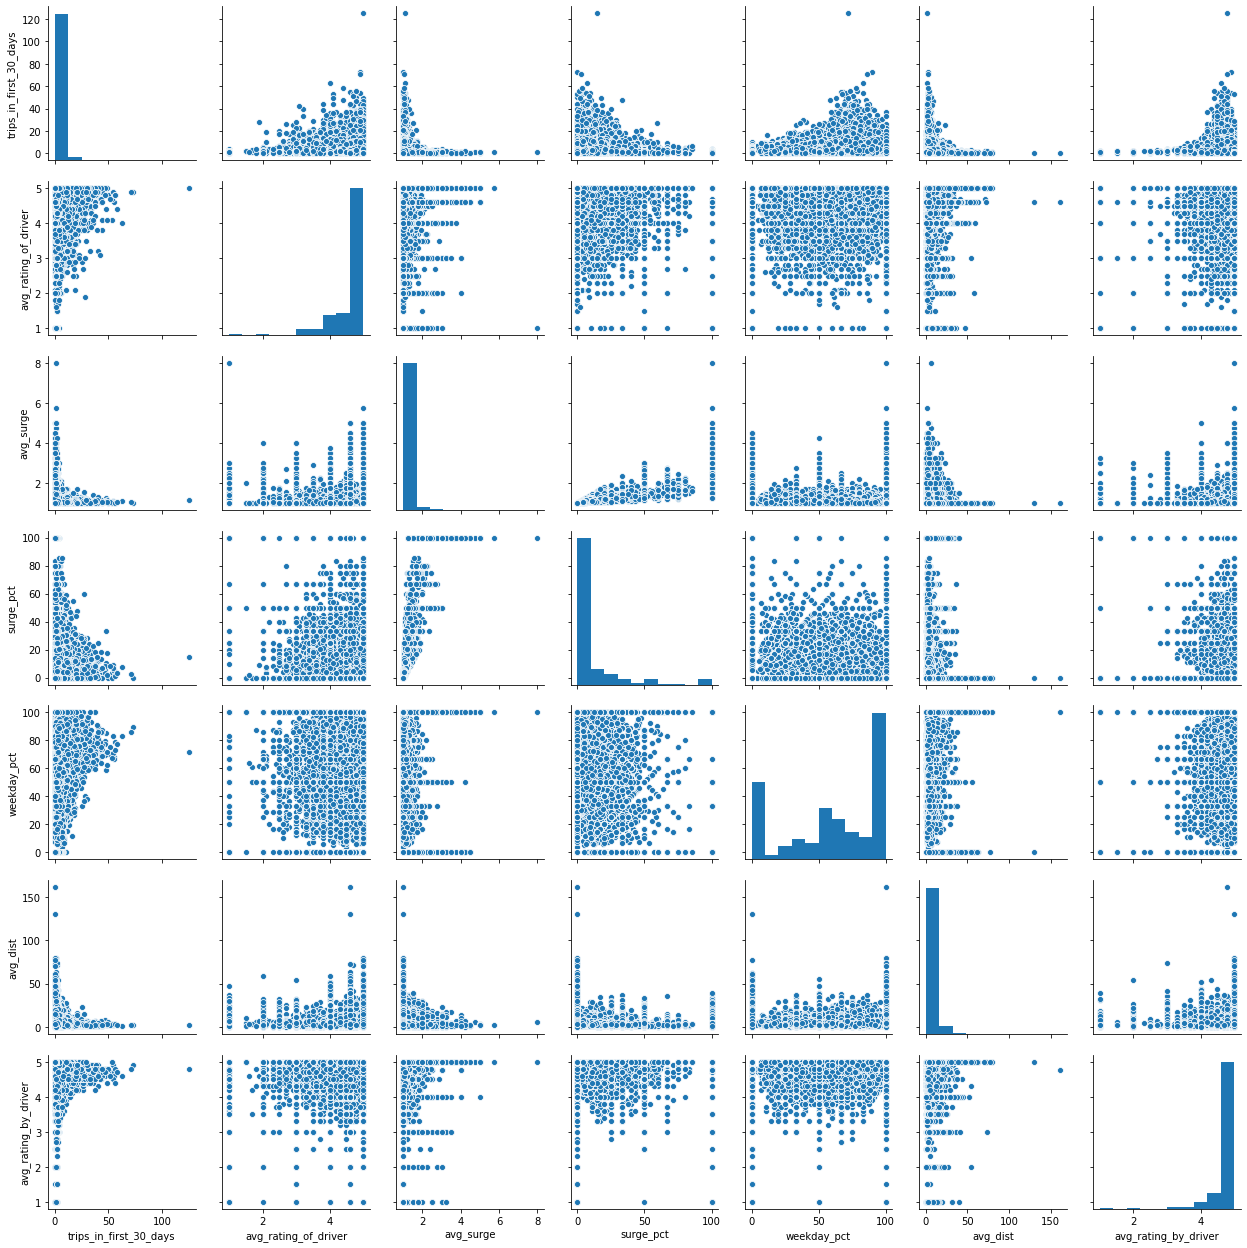

In [97]:
import seaborn as sns

df1 = df.drop('ultimate_black_user',axis=1)
sns.pairplot(df1)

There is hardly any correlation between numeric feature. Next we look at the categorical features.

Winterfell        23336
Astapor           16534
King's Landing    10130
Name: city, dtype: int64


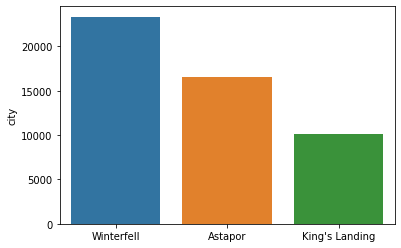

In [103]:
sns.barplot(x = list(df['city'].value_counts().index), y = df['city'].value_counts())
print(df['city'].value_counts())

iPhone     34864
Android    15136
Name: phone, dtype: int64


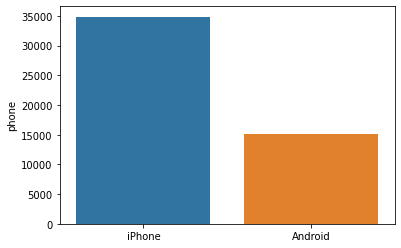

In [104]:
sns.barplot(x = list(df['phone'].value_counts().index), y = df['phone'].value_counts())
print(df['phone'].value_counts())

False    31146
True     18854
Name: ultimate_black_user, dtype: int64


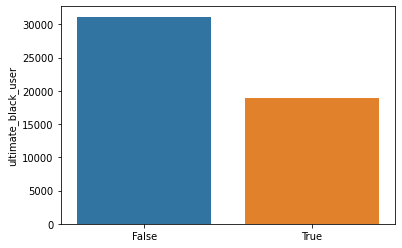

In [105]:
sns.barplot(x = list(df['ultimate_black_user'].value_counts().index), y = df['ultimate_black_user'].value_counts())
print(df['ultimate_black_user'].value_counts())

### Modeling

In [107]:
# Prepare target variable
df['retained'] = (df['last_trip_date'] > '2014-06-01')*1
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [116]:
# drop sign_up_date and last_trip_date columns
df_ml = df.drop(['signup_date','last_trip_date'],axis=1)
df_ml.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,4.7,1.10,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,5.0,1.00,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,False,82.4,3.13,4.9,0


In [117]:
# One hot encoding of categorical variable
dfo=df_ml[['phone','city']] # select object type columns
df_ml = pd.concat([df_ml.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)
df_ml.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,1,0
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,0,1,1,0,0
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,1,0
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,1,0,0,0,1


In [118]:
# Convert boolean to numeric
df_ml['ultimate_black_user']= df_ml['ultimate_black_user']*1
df_ml.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,phone_Android,phone_iPhone,city_Astapor,city_King's Landing,city_Winterfell
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1,0,1,0
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,1,0,1,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,1,1,0,0
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1,0,1,0
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,1,0,0,0,1


In [119]:
# Separate response variable
X = df_ml.drop('retained', axis=1)
y = df_ml['retained']

In [120]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I use here Random Forest for to build a classification model to predict user retention. Random Forest has benefits in terms of robustness to outliers and also it prevents overfitting.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

In [122]:
clf = RandomForestClassifier()
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/owner/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/owner/opt/anaconda3/l

[0.75503062 0.75403075 0.7545     0.75721965 0.75621953]
Average 5-Fold CV Score: 0.7554001094453142


In [125]:
X_train.shape

(40000, 13)

### Hyperparameter tuning


In [126]:
from sklearn.model_selection import GridSearchCV
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,13]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=2,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [127]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.78765
{'max_depth': 10, 'max_features': 7, 'n_estimators': 150}


In [128]:
#Apply RF to the training data:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn import metrics

rf = RandomForestClassifier(max_depth=10, max_features=7, n_estimators=150, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(round(Accuracy_rf,2))

[[5451  871]
 [1248 2430]]
0.79


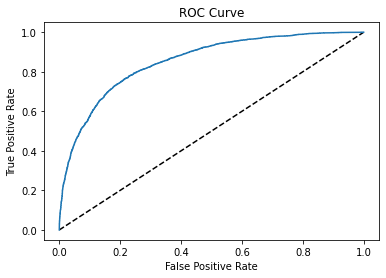

0.85

In [130]:
import matplotlib.pyplot as plt 
#Predicting proba
y_pred_prob = rf.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
round(metrics.auc(fpr_rf, tpr_rf),2)

In [133]:
# Compute and print AUC score
print("AUC: {:.4f}".format(metrics.auc(fpr_rf, tpr_rf),2))

AUC: 0.8528


The metrics of final model are:

**Test set accuracy**: 79%

**AUC**: 0.8528

In [134]:
fi = pd.DataFrame(list(zip(X.columns, rf.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
7,avg_rating_by_driver,0.225985
3,surge_pct,0.157306
11,city_King's Landing,0.123986
5,weekday_pct,0.086987
6,avg_dist,0.071803


### Recommendations

- **avg_rating_by_driver** Provide good service to customers to get good ratings
- **surge_pct** Provide good service to get higher surge_pct
- **city of King's Landing** Encourage customers from city of King's 